# 📘 **How to Use This Template**

## **Quick Start Guide**

This notebook provides a comprehensive, structured framework for data analysis and predictive modeling following the **PACE methodology** (Plan → Analyze → Construct → Execute).

### **Before You Begin:**
1. **Save a copy** of this template for your specific project
2. **Update the Project Overview** section with your project details
3. **Remove sections** that don't apply to your analysis type
4. **Add code cells** below each markdown section as you progress

### **Workflow by Project Type:**

**For Classification Projects** (e.g., churn prediction, fraud detection):
- Use all sections including class imbalance handling
- Focus on: Logistic Regression, Decision Tree, Random Forest, XGBoost models
- Key metrics: AUC-ROC, Precision, Recall, F1-score

**For Regression Projects** (e.g., price prediction, forecasting):
- Skip class imbalance sections
- Focus on: Linear Regression, Decision Tree, Random Forest, XGBoost models
- Key metrics: RMSE, MAE, R², Adjusted R²

**For Exploratory/Descriptive Analysis:**
- Focus on Plan and Analyze phases
- Use statistical testing sections
- May skip Construct phase entirely

### **Template Navigation Tips:**
- 📋 Each section has clear objectives and guiding questions
- 💭 Reflection prompts help document decisions and insights
- 📊 Reference tables provide quick guidance on methods and assumptions
- ✅ Use transition checklists to ensure completeness before moving to next phase

### **Key Features:**
- **Modular Design:** Use only what you need
- **Iterative Process:** Revisit earlier sections as needed
- **Documentation Built-in:** Insight sections prompt you to record findings
- **Best Practices:** Includes guidance on assumptions, ethics, and validation

---

## **Project Overview** 📋

**Project Title:**  
*e.g., Used Car Value Prediction*

**Objective:**  
*You have been hired by a dealership to build a pricing tool. They want to know the fair market value of used cars based on their specifications. However, the data they provided is slightly "dirty" (missing values and outliers), which is perfect for testing your template's robustness.*

**Data Source:**  
*Synthetic dataset generated internally.*

**Key Questions:** 

* *Your template should detect the missing values in mileage. How does it handle them? (Imputation via mean/median or drop?)*
* *Run a statistical test (e.g., T-Test or ANOVA) to determine if there is a statistically significant difference in price between cars with accident_history = 0 vs accident_history = 1.*
* *Your model needs numerical input. How does your template handle brand_tier and fuel_type? (One-Hot Encoding or Label Encoding?)*
* *Train a Linear Regression model (or Random Forest/XGBoost if your template supports it).*

**Success Metrics:**  
*RMSE (Root Mean Squared Error) and R-Squared value.*

*Success Criteria*
*Since this data is synthetic but logical, a good model should achieve an R-Squared between 0.80 and 0.95.*

* *If R² < 0.60: Check how you handled the outliers or missing data.*
* *If R² > 0.99: The model might be overfitting, or the "noise" added wasn't random enough.*

---

## **PACE Methodology** 🔄

This template follows the **PACE** framework for systematic data analysis and modeling:

| Stage         | Focus              | Key Activities                                                                 |
|---------------|--------------------|-------------------------------------------------------------------------------|
| **📝 Plan**   | Define & Prepare   | Business understanding, data exploration, problem formulation                  |
| **🔍 Analyze**| Explore & Clean    | EDA, data cleaning, feature engineering, statistical analysis                  |
| **🔧 Construct** | Model & Build   | Feature selection, model development, validation                               |
| **🚀 Execute**| Deploy & Communicate| Model evaluation, insights, recommendations, stakeholder communication         |

**PACE Flow:**  
*Plan → Analyze → Construct → Execute*

*Each stage builds on the previous, ensuring a structured, repeatable approach to data science projects.*

---
### **Transition to Plan**
Now that you have defined your project overview, move into the planning stage to clarify business context, technical approach, and resources.

<img src="images/Plan.png" width="75" height="75" align=left>

### **Pace: Plan**

#### **Understand the business scenario and problem**

#### **Key Planning Questions** 💭

**Business Context:**
- Who are the stakeholders and what are their needs?
    - Dealership looking to price used cars accurately.
- What business problem are we solving?
    - Determine the fair market value of used cars based on their specifications.
- What data do we have available?
    - Synthetic dataset with features like mileage, brand_tier, fuel_type, accident_history, etc.

**Technical Approach:**
- What type of analysis is needed (descriptive, predictive, prescriptive)?
    - Predictive analysis to estimate used car prices.
    - Statistical testing to compare price differences based on accident history.
- What are the success criteria?
    - RMSE and R-Squared value.
- What are potential limitations or ethical considerations?
    - Data quality issues (missing values, outliers).

**Resources & Timeline:**
- What tools and techniques will be used?
    - Statistical software (e.g., Python, R), libraries (e.g., pandas, scikit-learn)
    - Predictive modeling techniques (e.g., Linear Regression, Random Forest)
- What is the project timeline?
    - Since this is a practice project, set a timeline that allows for thorough exploration and learning.
- What external resources might be needed?
    - None.

#### **Data Dictionary**

| Feature                        | Description                       | Data Type        | Example Values         | Notes                        |
|-------------------|--------------------------------------------------|--------------|----------------------------|------------------------------------------|
| car_id            | Unique identifier for each car                   | Integer      | 1, 2, 3, ..., 2000         | Primary key                              |
| brand_tier        | Market segment classification of the car brand   | Categorical  | Economy, Mid-Range, Luxury | 50% Economy, 30% Mid-Range, 20% Luxury   |
| age_years         | Age of the vehicle in years                      | Integer      | 0-19                       | 0 = brand new, 19 = oldest               |
| horsepower        | Engine power output in horsepower                | Integer      | ~80-280 (normal), 5000 (outliers) | Contains intentional outliers for testing |
| mileage           | Total distance traveled in miles                 | Float        | 0-240,000                  | ~5% missing values (intentional)         |
| fuel_type         | Type of fuel the vehicle uses                    | Categorical  | Gasoline, Diesel, Electric | 70% Gasoline, 20% Diesel, 10% Electric   |
| accident_history  | Whether the car has been in an accident          | Binary       | 0 (No), 1 (Yes)            | 0 = No accident (80%), 1 = Accident (20%)|
| price             | Market value of the used car in USD              | Float        | $1,000-$50,000+            | Target variable for prediction           |

**Data Quality Notes**
- **Missing Values:** Upon completing preliminary analysis of the dataset, it was identified there are missing values in the following columns: mileage.
- **Outliers:** In the horsepower column, there are 5 rows with extremely high values (5000 HP) that are likely data entry errors.
- **Data Collection Period:** This data was generated synthetically.
- **Known Issues:** None beyond the intentional imperfections for testing purposes.

### **Task 1. Imports & Data Loading**

#### **Task 1a. Import Libraries**
- Import packages
- Load dataset

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### **Task 1b. Load Data**

In [109]:
# Generate Synthetic Dataset

# Set seed for reproducibility
np.random.seed(42)

# Generate 2000 samples
n_samples = 2000

# Feature generation
data = {
    'car_id': range(1, n_samples + 1),
    'brand_tier': np.random.choice(['Economy', 'Mid-Range', 'Luxury'], n_samples, p=[0.5, 0.3, 0.2]),
    'age_years': np.random.randint(0, 20, n_samples),
    'horsepower': np.random.normal(180, 50, n_samples).astype(int),
    'mileage': np.zeros(n_samples), # Placeholder
    'fuel_type': np.random.choice(['Gasoline', 'Diesel', 'Electric'], n_samples, p=[0.7, 0.2, 0.1]),
    'accident_history': np.random.choice([0, 1], n_samples, p=[0.8, 0.2]) # 0 = No, 1 = Yes
}

df = pd.DataFrame(data)

# Logic to make mileage somewhat realistic based on age (avg 12k miles per year + noise)
df['mileage'] = df['age_years'] * 12000 + np.random.normal(0, 5000, n_samples)
df['mileage'] = df['mileage'].apply(lambda x: max(x, 0)) # No negative mileage

# Logic to generate Price (Target Variable)
# Base price + Brand Premium - Age Depr. - Mileage Depr. + HP Bonus - Accident Penalty
def calculate_price(row):
    base_price = 15000
    brand_multiplier = {'Economy': 1, 'Mid-Range': 1.5, 'Luxury': 2.5}
    
    price = base_price * brand_multiplier[row['brand_tier']]
    price -= (row['age_years'] * 800)
    price -= (row['mileage'] * 0.05)
    price += (row['horsepower'] * 50)
    
    if row['accident_history'] == 1:
        price *= 0.70 # 30% drop for accidents
        
    # Add random market noise
    noise = np.random.normal(0, 2000)
    return max(price + noise, 1000) # Ensure price is at least $1000

df['price'] = df.apply(calculate_price, axis=1)

# --- INTRODUCTION OF "DIRTY" DATA --- #

# 1. Insert Missing Values in Mileage (5% of data)
nan_indices = np.random.choice(df.index, size=int(n_samples * 0.05), replace=False)
df.loc[nan_indices, 'mileage'] = np.nan

# 2. Insert Outliers in Horsepower (Some cars with impossible HP)
outlier_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[outlier_indices, 'horsepower'] = 5000 # Typo error

print("Dataset Generated successfully!")
print(df.head())

Dataset Generated successfully!
   car_id brand_tier  age_years  horsepower        mileage fuel_type  \
0       1    Economy          6         215   65554.640532  Gasoline   
1       2     Luxury          2         189   22408.329723  Gasoline   
2       3  Mid-Range         13         201  156087.096672  Gasoline   
3       4  Mid-Range          9         248  105918.890118  Gasoline   
4       5    Economy         15         223  177075.318589  Electric   

   accident_history         price  
0                 0  17812.474621  
1                 0  44285.492848  
2                 0  14582.443833  
3                 0  23858.890911  
4                 0   5418.556598  


---
### ***End of Plan Section Insights***
- What are the key business and technical objectives?
    - Build a predictive model to accurately estimate used car prices for a dealership.
- What are the main risks or limitations identified?
    - Data quality issues (missing values, outliers).
- What is your plan for the next stage?
    - Move into the Analyze phase to perform exploratory data analysis, clean the data, and prepare it for modeling.
- Is the available data sufficient and appropriate for analysis?
    - Yes, the synthetic dataset is suitable for testing the analysis template.
- What initial hypotheses or questions will guide your exploratory analysis?
    - An understanding that cars with accident history will have significantly lower prices than those without.
    - That the majority, if not all, of the variables will have some predictive power on price, but it will of course vary.
- What data quality issues or gaps need to be addressed before analysis?
    - There is missing data in the mileage column and outliers in the horsepower column that need to be handled.
- What resources, tools, or expertise will be required for the Analyze phase?
    - Statistical software (e.g., Python, R), libraries (e.g., pandas, scikit-learn), and expertise in data cleaning and exploratory data analysis techniques.
    - Predictive modeling techniques (e.g., Linear Regression, Random Forest).

---
### **Transition to Analyze**

With planning complete, begin exploring and cleaning your data to prepare for statistical analysis or modeling.

**✅ Before proceeding, ensure you have:**
- ✓ Clearly defined business objectives and success criteria
- ✓ Documented data sources and data dictionary
- ✓ Identified stakeholders and their requirements
- ✓ Assessed ethical considerations and potential biases
- ✓ Established project timeline and resources

**📋 Deliverables from Plan stage:**
- Project overview with objectives and metrics
- Data dictionary with variable descriptions
- Initial hypotheses and analysis questions
- Risk assessment and mitigation strategies

<img src="images/Analyze.png" width="75" height="75" align=left>

### **pAce: Analyze**

#### **Questions to reflect on during the Analyze stage** 💭

**Data Relationships & Distributions**
- What did you observe about the relationships between the variables?
- What did you observe about the distributions of the data?

**Data Transformation & Preparation**
- What transformations did you make to your data? Why did you choose to make those decisions?
- What are some purposes of EDA (Exploratory Data Analysis) before constructing a predictive model?

**Resources & References**
- What resources do you find yourself using as you complete this stage?

**Ethics & Responsible AI**
- Are there any ethical considerations in this stage?

### **Task 2. Data Exploration (*Initial EDA and Data Cleaning*)**
- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)
- Perform EDA (analyze relationships between variables)

#### **Task 2a. Gather Basic Information about the Data**

In [110]:
# Gather some basic information about the dataset
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            2000 non-null   int64  
 1   brand_tier        2000 non-null   object 
 2   age_years         2000 non-null   int32  
 3   horsepower        2000 non-null   int64  
 4   mileage           1900 non-null   float64
 5   fuel_type         2000 non-null   object 
 6   accident_history  2000 non-null   int64  
 7   price             2000 non-null   float64
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 117.3+ KB
None

Dataset Description:
             car_id brand_tier    age_years   horsepower        mileage  \
count   2000.000000       2000  2000.000000  2000.000000    1900.000000   
unique          NaN          3          NaN          NaN            NaN   
top             NaN    Economy          NaN          NaN            NaN   
freq    

#### **Task 2b. Descriptive Statistics about the Data**

In [111]:
# Descriptive Statistics
print("\nMissing Values in Each Column:")
print(df.isnull().sum())
print("\nOutlier Summary for Horsepower:")
print(df['horsepower'].describe())


Missing Values in Each Column:
car_id                0
brand_tier            0
age_years             0
horsepower            0
mileage             100
fuel_type             0
accident_history      0
price                 0
dtype: int64

Outlier Summary for Horsepower:
count    2000.000000
mean      190.333500
std       245.798474
min        13.000000
25%       144.000000
50%       178.000000
75%       213.000000
max      5000.000000
Name: horsepower, dtype: float64


#### **Task 2c. Rename Columns**

#### **Task 2d. Drop Columns**

#### **Task 2e. Handle Duplicate Values**

In [112]:
# Check for and handle any duplicate values
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


#### **Task 2f. Handle Missing Values & Incomplete Data**

In [113]:
# Handle any missing values (e.g., impute with median)
df['mileage'].fillna(df['mileage'].median(), inplace=True)
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
car_id              0
brand_tier          0
age_years           0
horsepower          0
mileage             0
fuel_type           0
accident_history    0
price               0
dtype: int64



Missing values after imputation:
car_id              0
brand_tier          0
age_years           0
horsepower          0
mileage             0
fuel_type           0
accident_history    0
price               0
dtype: int64


C:\Users\Personal\AppData\Local\Temp\ipykernel_7096\3761931145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].median(), inplace=True)


##### ***End of Section Insights***

#### **Task 2g. Check Class Imbalances** *(For Classification Problems)*

**Note:** Checking class balance early helps inform your EDA strategy and modeling approach. For regression problems, skip this section.

| Model                | Importance of Handling Class Imbalances | Why?                                                                                                                                                                                                  |
|----------------------|-----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Decision Trees (DT)  | Moderate                                | Decision Trees can handle some imbalance due to splitting on feature importance, but severe imbalance may bias splits toward the majority class. Consider class weighting or resampling if imbalance is high. |
| Random Forests (RF)  | Moderate                                | Random Forests are more robust than single trees but can still favor the majority class with significant imbalance. Use class weighting, balanced subsampling, or SMOTE for better minority class prediction. |
| Linear Regression    | Low                                     | Linear Regression is not used for classification, so class imbalance is not directly relevant. For regression with imbalanced targets, focus on distributional skew rather than class imbalance.            |
| Logistic Regression  | High                                    | Logistic Regression is sensitive to class imbalance, which can bias decision boundaries and reduce minority class recall. Use class weighting, oversampling, or undersampling to address imbalance.         |
| XGBoost              | Moderate to High                        | XGBoost is robust to some imbalance due to boosting, but severe imbalance can still bias results. Adjust `scale_pos_weight`, use custom metrics (AUC-ROC), or resample data for best results.               |

**Note:** Checking class balance early helps inform your EDA strategy and modeling approach. For regression problems, skip this section.

### **Task 3. Data Exploration *(Continue EDA)***

##### **Check Class Imbalance in the Target Variable**

#### **Task 3a. Data Visualizations** 📊

This section provides comprehensive visualizations to understand data distributions, relationships, and patterns.

**Note**: Visualizations in this section can instead be created in other tools like Tableau or Power BI.

##### **Univariate Visualizations**

##### Categorical Features

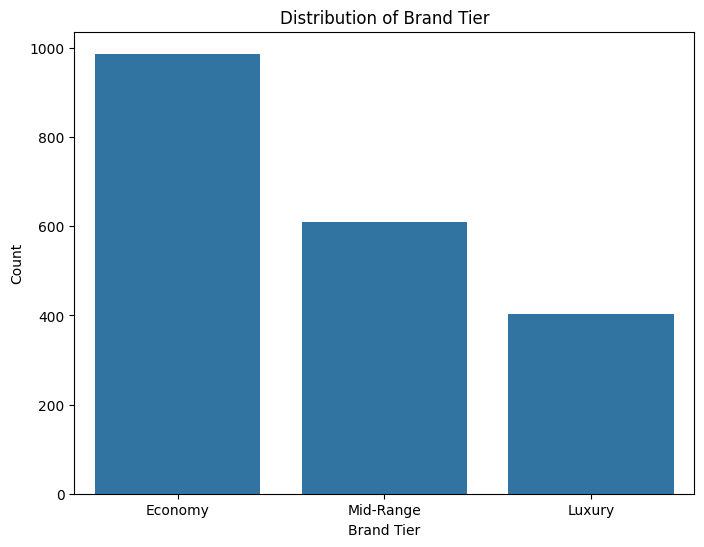

In [114]:
# Plot for categorical variable brand_tier
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='brand_tier', order=df['brand_tier'].value_counts().index)
plt.title('Distribution of Brand Tier')
plt.xlabel('Brand Tier')
plt.ylabel('Count')
plt.show()

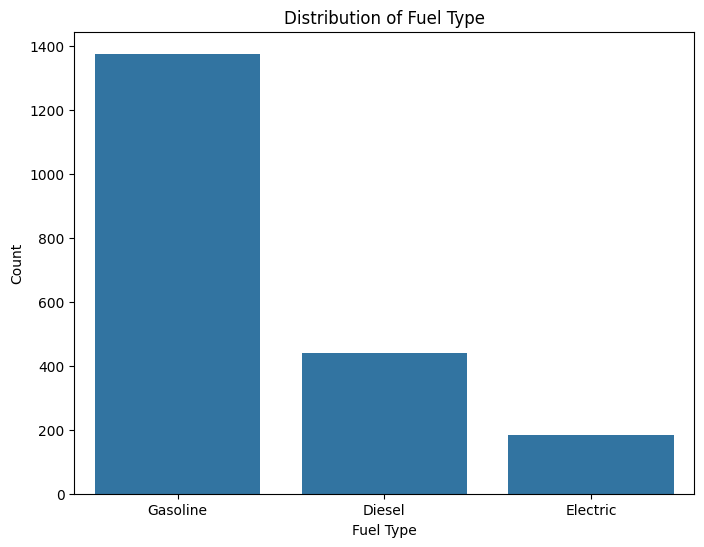

In [115]:
# Plot for categorical variable fuel_type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='fuel_type', order=df['fuel_type'].value_counts().index)
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


##### Boolean Variables

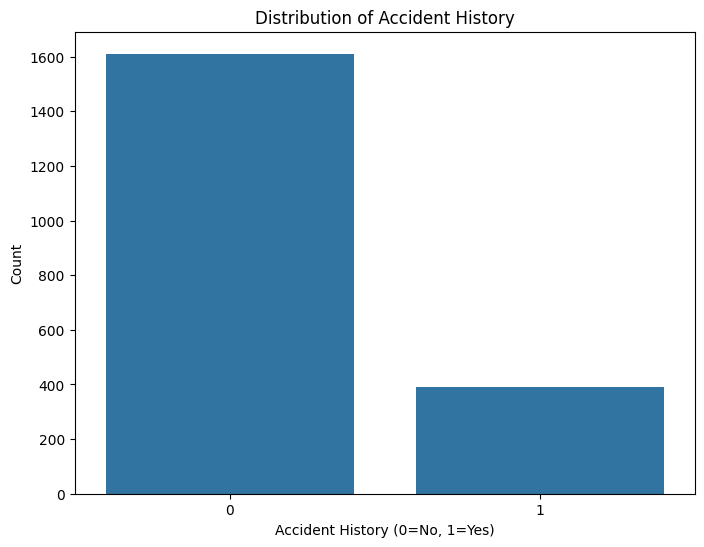

In [116]:
# Plot for binary categorical variable accident_history
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='accident_history', order=[0, 1])
plt.title('Distribution of Accident History')
plt.xlabel('Accident History (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

##### Discrete Numeric Variables

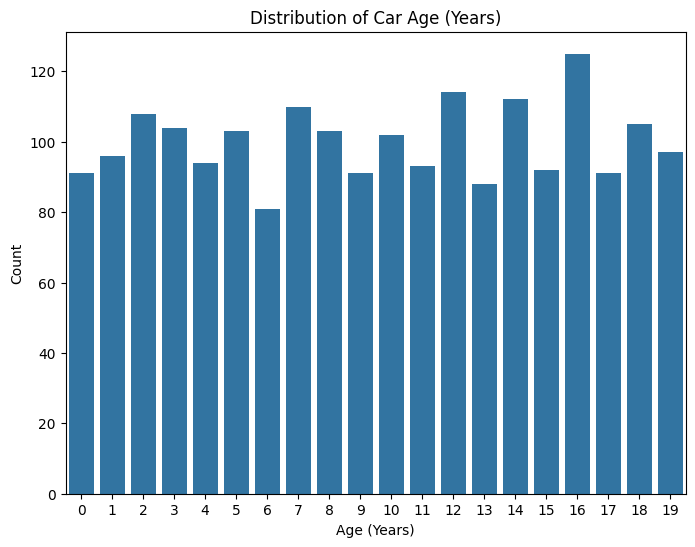

In [117]:
# Plot for discrete numeric variable age_years
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_years', order=sorted(df['age_years'].unique()))
plt.title('Distribution of Car Age (Years)')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()


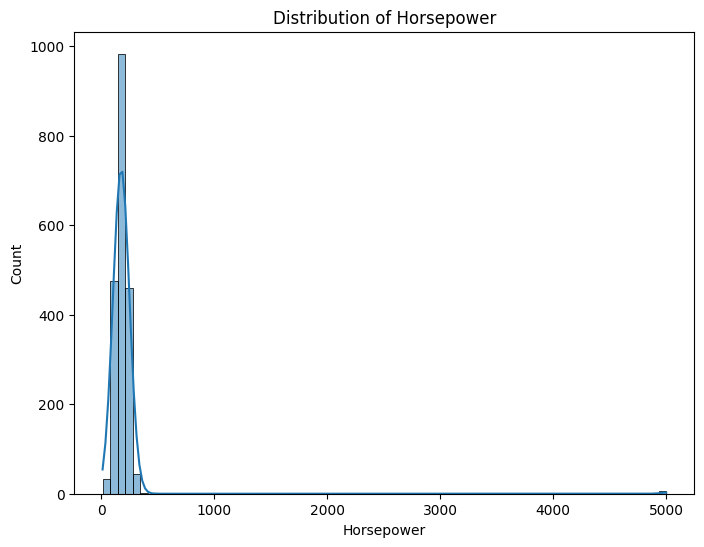

In [118]:
# Plot for discrete numeric variable horsepower
plt.figure(figsize=(8, 6))
sns.histplot(df['horsepower'], bins=75, kde=True)
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.show()

##### Continuous Numeric Variables

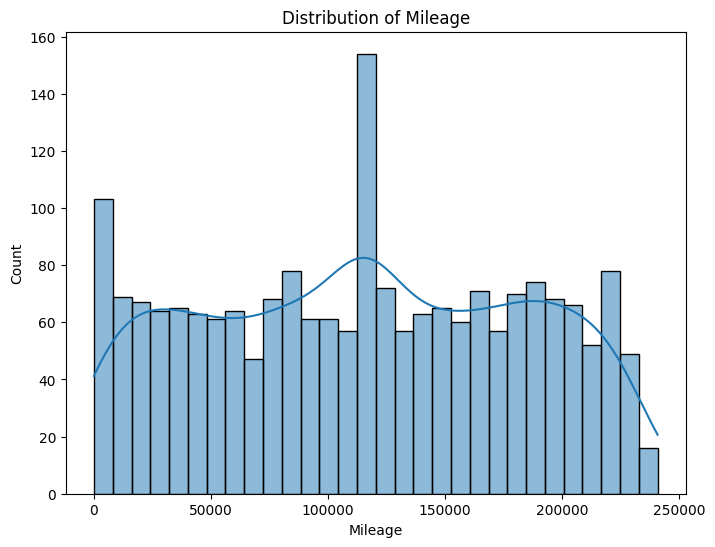

In [119]:
# Plot for continuous numeric variable mileage
plt.figure(figsize=(8, 6))
sns.histplot(df['mileage'], bins=30, kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.show()


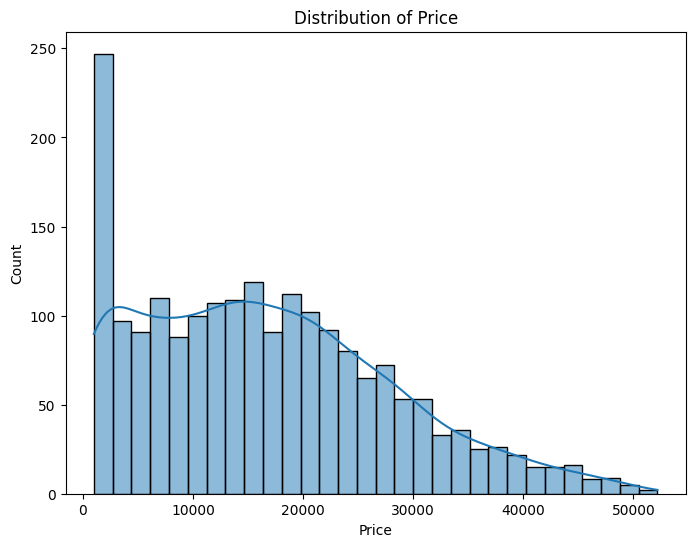

In [120]:
# Plot for continuous numeric variable price
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

#### **Bivariate Visualizations**

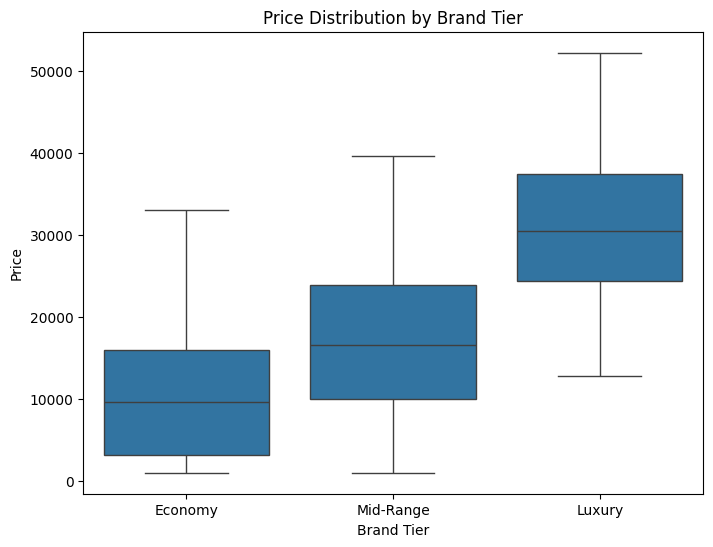

In [121]:
# Compare price across brand_tier
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='brand_tier', y='price', order=['Economy', 'Mid-Range', 'Luxury'])
plt.title('Price Distribution by Brand Tier')
plt.xlabel('Brand Tier')
plt.ylabel('Price')
plt.show()

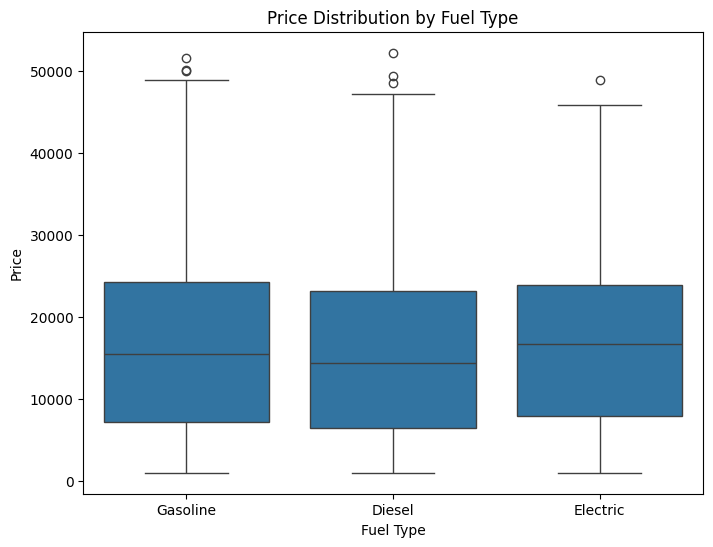

In [122]:
# Compare price across fuel_type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='fuel_type', y='price', order=['Gasoline', 'Diesel', 'Electric'])
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

##### **Feature Comparisons**

#### **Multivariate Visualizations**

##### **Feature Comparisons**

##### ***End of Section Insights***

### **Task 3 (continued). Data Preparation & Feature Engineering**

#### **Task 3b. Feature Engineering**

#### **Task 3c. First Iteration of Feature Selection**

#### **Task 3d. Investigate Features Further (Optional)**

#### **Task 3e. Outliers**

Outliers can have varying impacts depending on the modeling approach. Always visualize and assess outliers before modeling. Consider robust methods or transformations if outliers are present.

| Model               | Importance of Handling Outliers | Why?                                                                                                                                                                                                 |
|---------------------|---------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Decision Trees (DT) | Low                             | Decision Trees split data based on thresholds, making them inherently robust to outliers. Extreme outliers may slightly influence split thresholds, especially in shallow trees.                    |
| Random Forests (RF) | Low to Moderate                 | Random Forests average predictions across multiple trees, reducing the influence of outliers. Consistent outliers across samples may slightly affect feature importance rankings.                   |
| Linear Regression   | High                            | Outliers can disproportionately influence the regression line, distorting coefficients and residuals, leading to poor model performance and interpretability.                                      |
| Logistic Regression | Moderate to High                | Outliers can affect the decision boundary, especially if they dominate the feature space. The sigmoid function reduces sensitivity, but extreme outliers can still skew predictions.               |
| XGBoost             | Moderate                        | XGBoost is generally robust to outliers due to its tree-based nature and regularization. However, dominant outliers can influence split thresholds and feature importance, especially early on.     |
| Statistical Testing | High                            | Outliers can strongly affect tests (t-tests, ANOVA, correlation) by inflating variance and distorting means. Non-parametric tests (e.g., Mann-Whitney U, Wilcoxon) are less sensitive. Always check for outliers and consider robust alternatives if needed. |

**Tip:**  
- Use boxplots or histograms to visually inspect outliers.
- Consider winsorizing, transformation, or robust models if outliers are problematic.

##### **Check for Outliers**

In [123]:
# Check for outliers in horsepower
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['horsepower'] < lower_bound) | (df['horsepower'] > upper_bound)]
print(f"\nNumber of outliers in horsepower: {outliers.shape[0]}")
print(outliers)


Number of outliers in horsepower: 17
      car_id brand_tier  age_years  horsepower        mileage fuel_type  \
214      215  Mid-Range          7          37   82625.594146  Gasoline   
521      522    Economy         18          13  211282.149661  Gasoline   
738      739    Economy         17        5000  199219.875186  Gasoline   
755      756  Mid-Range          8        5000   96863.483251  Gasoline   
762      763    Economy         18         326  209725.203146  Gasoline   
932      933     Luxury          3        5000   29318.374067    Diesel   
1161    1162    Economy         10         317  119498.030058  Gasoline   
1221    1222    Economy         16          35  190056.854182  Gasoline   
1296    1297    Economy         17        5000  115237.228238  Gasoline   
1377    1378  Mid-Range         10         324  129222.773481  Gasoline   
1482    1483  Mid-Range          9         334  114394.379786  Gasoline   
1499    1500     Luxury          2          27   21114.187606 

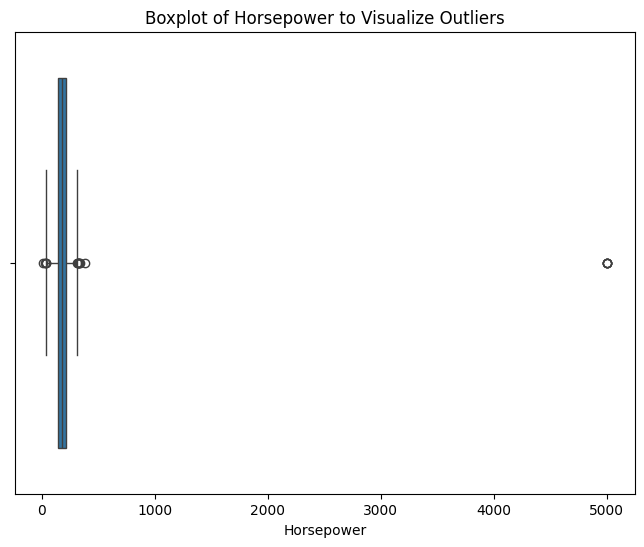

In [124]:
# Plot a boxplot to visualize outliers in the 'horsepower' variable.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='horsepower')
plt.title('Boxplot of Horsepower to Visualize Outliers')
plt.xlabel('Horsepower')
plt.show()

##### **Manage Outliers with IQR Method**

In [125]:
# Handle outliers with the IQR method
df = df[(df['horsepower'] >= lower_bound) & (df['horsepower'] <= upper_bound)]

#### **Task 3f. Check Assumptions (Data-Level)**

These checks are performed **before modeling** to:
- Validate suitability for statistical tests (t-tests, ANOVA, correlation)
- Guide data transformations and preprocessing
- Inform feature selection decisions

**Note:** For predictive models, model-specific assumptions (linearity, homoscedasticity of residuals, normality of residuals) are checked **after** model development in Task 4b using residual diagnostics.

##### **Normality**

##### Continuous Numeric Variables

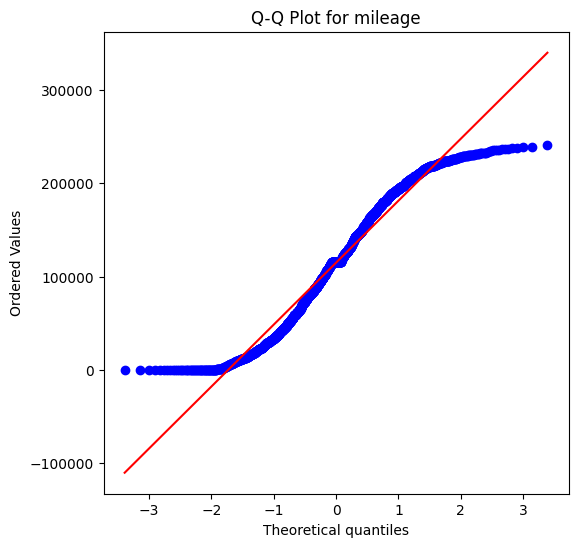

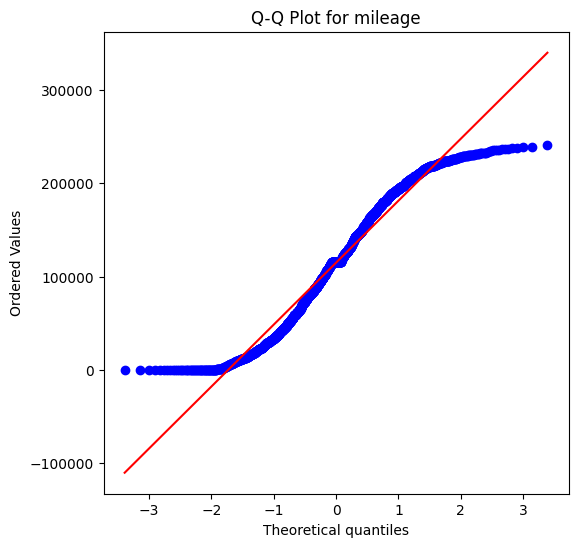

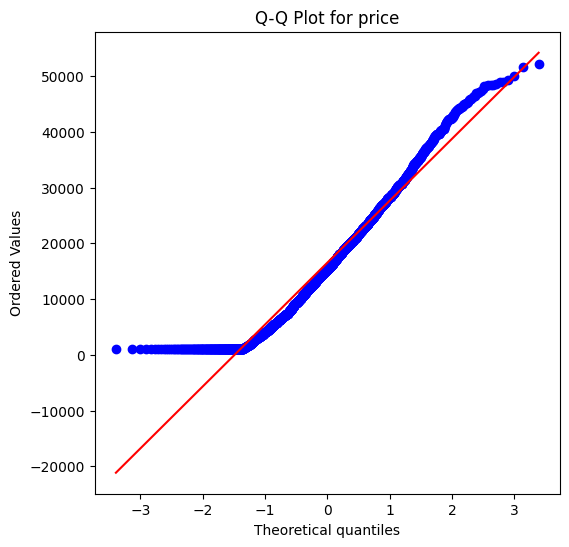

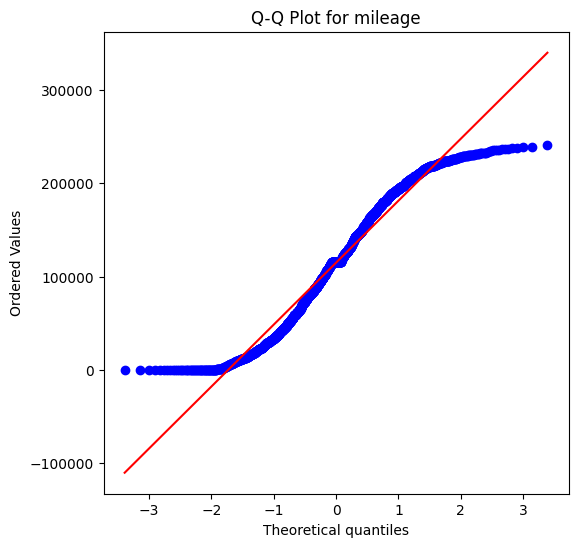

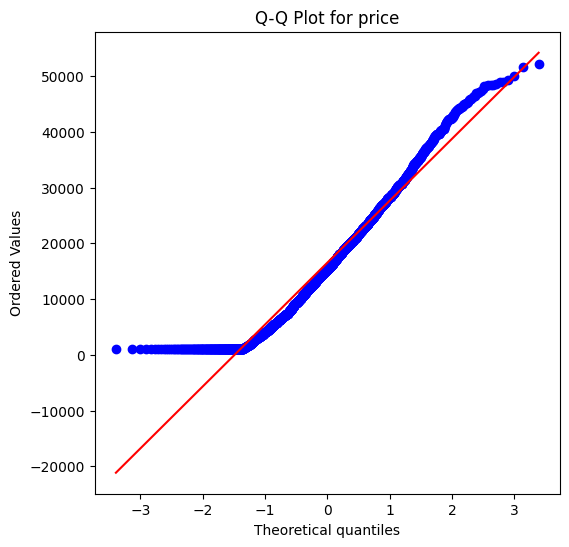

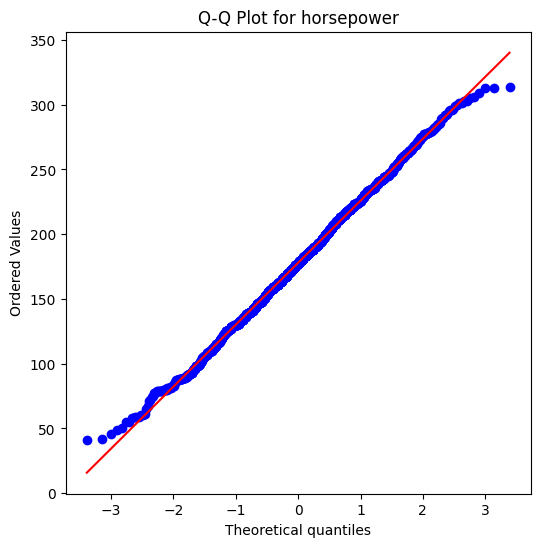

In [126]:
# Check normality of all continuous variables using Q-Q plots
continuous_vars = ['mileage', 'price', 'horsepower']
for var in continuous_vars:
    plt.figure(figsize=(6, 6))
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {var}')
    plt.show()

##### Discrete Numeric Variables

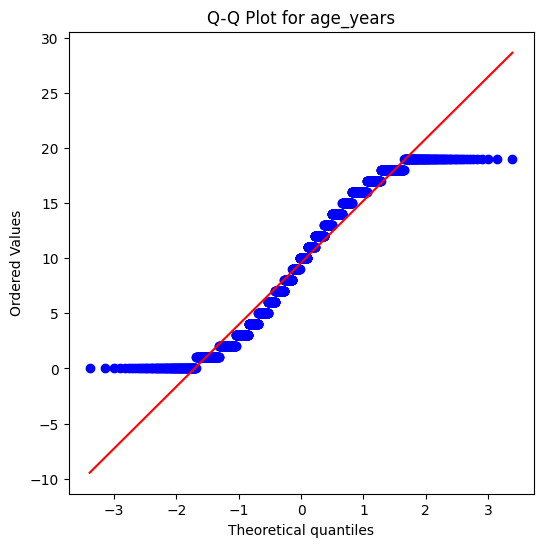

In [127]:
# Check normality of all discrete numeric variables using Q-Q plots
discrete_vars = ['age_years']
for var in discrete_vars:
    plt.figure(figsize=(6, 6))
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {var}')
    plt.show()


##### **Homogeneity of Variance** *(Equal Variance)*

##### **Independence**

##### Testing for independence between variables and observations

##### **Sample Size**

In [128]:
# Check that sample size is sufficient for analysis
n_rows, n_cols = df.shape
print(f"\nDataset contains {n_rows} rows and {n_cols} columns.")


Dataset contains 1983 rows and 8 columns.


#### **Task 3g. Statistical Testing**

**Null Hypothesis (H₀):** There is no statistically significant difference in price between cars with and without an accident history.

**Alternative Hypothesis (Hₐ):** There is a statistically significant difference in price between cars with and without an accident history.

##### **Statistical Testing Metrics Reference** 📊

- **P-value:** Probability of observing results as extreme as those measured, assuming the null hypothesis is true (commonly, < 0.05 indicates statistical significance).
- **Z-statistic:** Standardized value showing how many standard deviations a sample mean is from the population mean; used for large samples or when population variance is known.
- **T-statistic:** Measures the difference between group means relative to sample variability; used for smaller samples or when population variance is unknown.
- **Effect Size (Cohen's d):** Quantifies the magnitude of the difference between groups, regardless of sample size.
  - Small: 0.2, Medium: 0.5, Large: 0.8
- **Confidence Interval:** Range of values within which the true population parameter is likely to fall, with a given level of confidence (e.g., 95%).
- **Statistical Power:** Probability that a test will detect a true effect when it exists (aim for 80%+ to reduce risk of Type II error).

*Tip: Always report both statistical significance (p-value) and practical significance (effect size/confidence interval) for context.*

##### **Run Statistical Tests**

In [129]:
# Determine if there is a statistically significant difference in price between cars with accident_history = 0 vs accident_history = 1.
group0 = df[df['accident_history'] == 0]['price']
group1 = df[df['accident_history'] == 1]['price']
t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
print(f"\nT-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference in price based on accident history.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference in price based on accident history.")


T-statistic: 8.69048506853802, P-value: 1.9843620490233108e-17
Reject the null hypothesis: There is a statistically significant difference in price based on accident history.


##### **Check Statistical Significance of Numeric, Binary and Categorical Features**

| Method                        | Description                                                                 | Importance for Decision Trees (DT) | Importance for Random Forests (RF) | Importance for Linear Regression | Importance for Logistic Regression | Importance for XGBoost | Why?                                                                                                   |
|-------------------------------|-----------------------------------------------------------------------------|------------------------------------|------------------------------------|-----------------------------------|-------------------------------------|-------------------------|-------------------------------------------------------------------------------------------------------|
| Statistical Significance Tests | Evaluates the relationship between individual features and the target variable (e.g., t-tests, chi-square). | Low                                | Low to Moderate                   | High                              | High                                | Low to Moderate         | Essential for regression models to identify predictive features. For tree-based models, less critical due to built-in feature selection, but can help with interpretability and initial screening. |

##### **Check Statistical Significance of Features for Modeling**

In [130]:
# Check statistical significance of independent variables compared to dependent variable price to determine which can be dropped prior to modeling.
independent_vars = ['brand_tier', 'age_years', 'horsepower', 'mileage', 'fuel_type', 'accident_history']
for var in independent_vars:
    if df[var].dtype == 'object' or len(df[var].unique()) <= 10:
        # Categorical variable - ANOVA
        groups = [df[df[var] == level]['price'] for level in df[var].unique()]
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"\nANOVA for {var} - F-statistic: {f_stat}, P-value: {p_val}")
    else:
        # Continuous variable - Correlation
        corr, p_val = stats.pearsonr(df[var], df['price'])
        print(f"\nCorrelation for {var} - Correlation coefficient: {corr}, P-value: {p_val}")


ANOVA for brand_tier - F-statistic: 923.9339711311005, P-value: 3.7252995593894206e-284

Correlation for age_years - Correlation coefficient: -0.6419579983412512, P-value: 8.57693932793773e-231

Correlation for horsepower - Correlation coefficient: 0.20227647890289993, P-value: 9.367344878185972e-20

Correlation for mileage - Correlation coefficient: -0.6266450253365038, P-value: 8.479594775613035e-217

ANOVA for fuel_type - F-statistic: 0.9914408685190491, P-value: 0.37122580682207795

ANOVA for accident_history - F-statistic: 49.52084581871932, P-value: 2.693927232941423e-12


##### **Remove Statistically Insignificant Variables**

In [131]:
# Drop statistically insignificant variables based on p-value threshold of 0.05
df.drop(columns=['fuel_type'], inplace=True)

#### **Task 3h. Variable Skewness**

| Model                | Importance of Handling Skewness | Why?                                                                                                   |
|----------------------|---------------------------------|--------------------------------------------------------------------------------------------------------|
| Decision Trees (DT)  | Low                             | Decision Trees split data by thresholds and are robust to skewed distributions. Extreme skewness may cause imbalanced splits or affect interpretability. |
| Random Forests (RF)  | Low                             | Random Forests inherit robustness from Decision Trees. Severe skewness is rarely problematic but can occasionally contribute to overfitting or biased feature importance. |
| Linear Regression    | High                            | Linear Regression is sensitive to skewed features, which can distort coefficients and residuals. Transformations (e.g., log, Box-Cox) are often necessary for valid inference. |
| Logistic Regression  | High                            | Logistic Regression assumes linearity in the logit; skewed features can reduce model accuracy and interpretability. Transformations are recommended. |
| XGBoost              | Moderate                        | XGBoost is robust to skewness due to its tree-based nature, but highly skewed features can influence split thresholds or dominate feature importance. Transformations may improve results. |

##### **Check Variable Skewness**

In [132]:
# Check skewness of all numeric variables
numeric_vars = ['age_years', 'horsepower', 'mileage', 'price']
for var in numeric_vars:
    skewness = df[var].skew()
    if abs(skewness) > 0.75:
        print(f"\n{var} is highly skewed (skewness: {skewness}). Consider transformation.")

##### **Manage Variable Skewness**

#### **Task 3i. Encode Features**

In [133]:
# Encode categorical variables for modeling
df = pd.get_dummies(df, columns=['brand_tier'], drop_first=True, dtype=int)

In [134]:
# Print dataset after preprocessing
print("\nDataset after preprocessing:")
print(df.head())


Dataset after preprocessing:
   car_id  age_years  horsepower        mileage  accident_history  \
0       1          6         215   65554.640532                 0   
1       2          2         189   22408.329723                 0   
2       3         13         201  156087.096672                 0   
3       4          9         248  105918.890118                 0   
4       5         15         223  177075.318589                 0   

          price  brand_tier_Luxury  brand_tier_Mid-Range  
0  17812.474621                  0                     0  
1  44285.492848                  1                     0  
2  14582.443833                  0                     1  
3  23858.890911                  0                     1  
4   5418.556598                  0                     0  


#### **Task 3j. Remove Highly Correlated Features (Correlation Heatmaps & VIF)**

| Model Type           | Importance | Why?                                                                                                                                                                                                  |
|----------------------|------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Decision Trees       | Moderate   | Decision Trees are not sensitive to multicollinearity for prediction, but correlated features can affect feature importance rankings, which matters for interpretation and feature selection.           |
| Random Forests       | Low        | Random Forests are robust to multicollinearity, but correlated features may still bias feature importance scores. Consider removing highly correlated features if interpretability is important.      |
| Linear Regression    | High       | Multicollinearity causes unstable coefficients, inflated standard errors, and unreliable interpretations. VIF is critical for diagnosing and addressing this issue.                                   |
| Logistic Regression  | High       | Like linear regression, logistic regression is sensitive to multicollinearity, leading to unstable coefficients and interpretability challenges. VIF is an important diagnostic tool.                 |
| XGBoost              | Low        | XGBoost is generally robust to multicollinearity due to tree-based splits and built-in regularization (L1/L2). Correlated features may affect feature importance but rarely degrade predictive power. |

**Notes:**
1. For tree-based models, multicollinearity does not harm predictive performance but can bias feature importance, which is relevant for interpretation.
2. For regression models, always check VIF and remove/reduce highly correlated features.
3. For XGBoost, regularization helps, but review feature importance for interpretability.

##### **Check for Multicollinearity with Correlation Heatmaps**

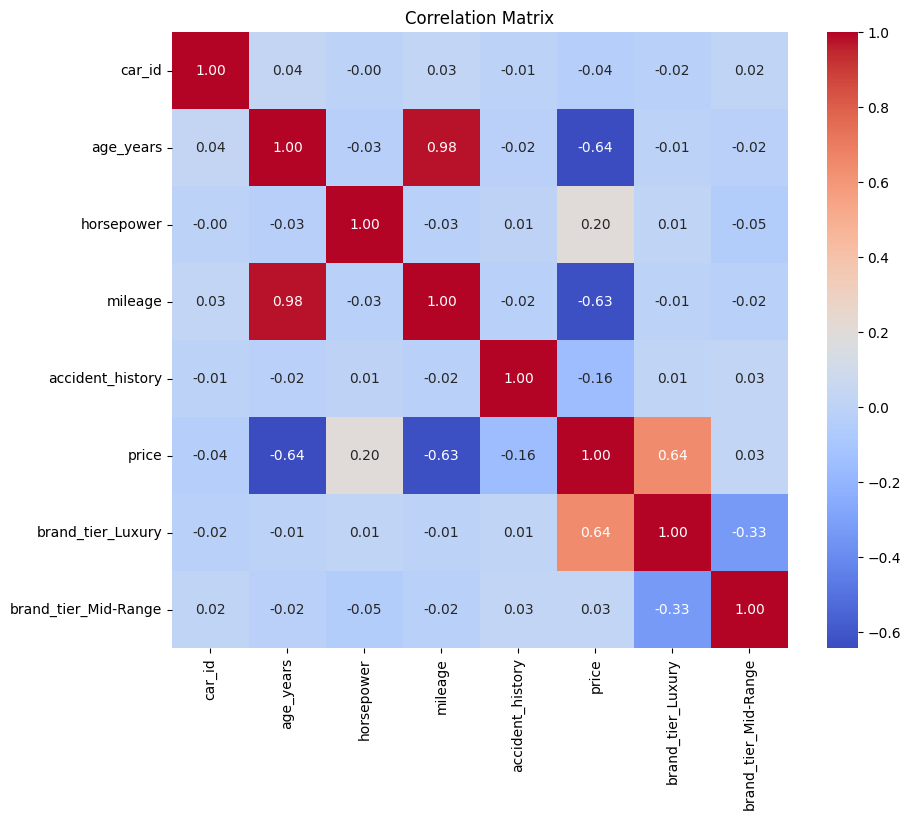

In [135]:
# Check for multicollinearity among independent variables with a correlation matrix plot.
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

##### **Check For Multicollinearity (VIF)**

In [136]:
# Check for multicollinearity with VIF.
X = df.drop(columns=['car_id', 'price'])
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
                feature        VIF
0             age_years  85.484261
1            horsepower   3.954163
2               mileage  87.487748
3      accident_history   1.230718
4     brand_tier_Luxury   1.364220
5  brand_tier_Mid-Range   1.526169


##### **Remove Highly Correlated Features**

In [137]:
# Remove feature 'age_years' due to high correlation with 'mileage' and high VIF
df.drop(columns=['mileage'], inplace=True)

---
### ***End of Analyze Section Insights***
- What are the most important data quality or distribution issues discovered?
    - Outliers in horsepower and missing values in mileage.
- What features or variables require special attention in the next stage?
    - With outliers and missing values being addressed, there shouldn't be a significant amount of special handling needed for remaining features.
- What is your plan for feature selection or engineering?
    - Initial feature selection was completed based on statistical significance and correlation analysis. Further feature engineering may be explored in the Construct phase utilizing domain knowledge and additional feature elimination methods.
- Were any unexpected patterns, trends, or anomalies identified?
    - Beyond the outliers and missing values, no unexpected patterns were observed.
- How did handling missing values, outliers, or skewness affect the dataset?
    - The number of outliers were few and were managed without significant impact on the dataset. Missing values in mileage were imputed using the median, which preserved the overall distribution.
- Are there any features that may introduce bias or ethical concerns?
    - None identified.
- What limitations remain in the data after cleaning and transformation?
    - The synthetic nature of the dataset may limit real-world applicability, but it is sufficient for testing the analysis template.
- What assumptions have you made during EDA that should be revisited later?
    - Assumed that missing mileage values were random and could be imputed without biasing the dataset.
- What additional data or context would improve the analysis?
    - Real-world data with more variability and complexity would enhance the analysis.
- What modeling challenges do you anticipate based on your EDA findings?
    - With outliers, missing data and multicollinearity being addressed, there are no significant anticipated challenges at this point.
- Are there specific features or data transformations that may require special handling in the modeling phase?
    - Outliers in horsepower have been managed, and mileage hsa been imputed, as well as multicollinearity addressed. There shouldn't be any features that require spceial handling at this point.
- What criteria will you use to evaluate feature selection and model performance?
    - RMSE and R-Squared for regression performance.
- How will your EDA findings influence your choice of modeling techniques?
    - Due to the few outliers and missing data being addressed, as well as remaining features having low multi-collinearity, standard modeling techniques like linear regression will be appropriate.
- Are there any features you expect to be especially predictive or problematic for modeling?
    - I expect all features to have some predictive power, but I would expect age_years and accident_history to be especially predictive.
- What steps will you take if initial models do not perform as expected?
    - Revisit feature engineering, consider additional transformations, or explore alternative modeling techniques.


#### **Save Analysis-Ready Dataset**

**Checkpoint:** Save your fully prepared dataset with all transformations, feature engineering, and cleaning applied. This dataset is ready for modeling.

**Recommended naming:** `{project_name}_analysis_ready.csv` or `.pkl`

In [138]:
# Save the dataset.
df.to_csv('used_car_value_cleaned.csv', index=False)

---
### **Transition to Construct**

With your data prepared and features selected, proceed to model development, validation, and post-model assumption testing.

**✅ Before proceeding, ensure you have:**
- ✓ Completed data cleaning (missing values, duplicates, outliers handled)
- ✓ Performed comprehensive EDA with visualizations
- ✓ Engineered and selected relevant features
- ✓ Checked statistical assumptions and conducted tests
- ✓ Addressed class imbalance if applicable
- ✓ Saved analysis-ready dataset

**📋 Deliverables from Analyze stage:**
- Clean, transformed dataset ready for modeling
- EDA insights and patterns documented
- Statistical test results (if applicable)
- Feature engineering rationale
- List of features selected for modeling

<img src="images/Construct.png" width="75" height="75" align=left>

## **paCe: Construct**

#### **Questions to reflect on during the Construct stage** 💭
**Data & Model Diagnostics**
- Do you observe anything unusual?
- Have all the assumptions been met?
- How well does the model fit the data?
- How will you validate model performance (e.g., cross-validation, test set)?
- What criteria will you use to determine if the model is successful?

**Feature Selection & Rationale**
- Which independent variables did you select for the model, and what was your rationale?
- Are there any features or data transformations that require special handling in modeling?

**Model Improvement & Iteration**
- Can the model be improved? Are there any changes you would make?

**Resources & References**
- What resources did you consult during this stage? (Please include links.)

**Ethics & Responsible AI**
- Are there any ethical considerations at this stage?

### **Task 4. Model Development**

#### **Task 4a. Prepare Data for Modeling**

**Key Activities:**
- Define features (X) and target variable (y)
- Split data into training and test sets
- Set up cross-validation strategy
- Apply feature scaling/normalization if needed (for regression models)
- Handle any remaining data preparation specific to modeling

**Best Practices:**
- Use stratified split for classification to preserve class distribution
- Typical split: 70-80% training, 20-30% test
- Set random_state for reproducibility
- Ensure no data leakage (fit transformations only on training data)

**Note:** For tree-based models (DT, RF, XGBoost), feature scaling is not required.

#### **Model Selection Guidance** 🎯

**Quick Model Selection Guide:**

| Issue                   | Linear/Logistic Regression                | Tree-Based Models (DT/RF/XGBoost)           |
|-------------------------|-------------------------------------------|---------------------------------------------|
| **Multicollinearity**   | ⚠️ **Critical** – Remove correlated features | ✅ **Low impact** – Models handle naturally  |
| **Feature Scaling**     | ⚠️ **Required** – Standardize features      | ✅ **Not needed** – Tree splits are scale-invariant |
| **Missing Values**      | ⚠️ **Must handle** – Impute before modeling | 🔶 **Some tolerance** – XGBoost handles natively |
| **Outliers**            | ⚠️ **Sensitive** – Consider removal/transformation | ✅ **Robust** – Tree splits minimize impact  |
| **Feature Interactions**| ⚠️ **Manual** – Must engineer interactions | ✅ **Automatic** – Naturally captures interactions |
| **Interpretability**    | ✅ **High** – Clear coefficient interpretation | 🔶 **Medium** – Feature importance available |

**Choose Linear/Logistic when:** You need high interpretability and have clean, well-prepared data.

**Choose Tree-based when:** You want robustness, automatic feature handling, and strong predictive performance.

*Tip: Consider your business objectives, data quality, and need for interpretability when selecting a model.*

#### **Task 4b. Build and Iterate Models**

**Key Activities:**
- Select appropriate modeling techniques based on data characteristics and business objectives
- Build and tune initial models using cross-validation and hyperparameter optimization
- Check model assumptions and diagnose potential issues (e.g., overfitting, multicollinearity, class imbalance)
- Evaluate model performance using relevant metrics (e.g., accuracy, recall, AUC, F1-score)
- Iterate on feature selection and model parameters to improve performance

##### **Model Evaluation Metrics Reference** 📊

**For Classification Models:**
- **AUC (ROC-AUC):** Area under the ROC curve; measures ability to distinguish classes (higher = better).
- **Precision:** Proportion of predicted positives that are actual positives (focuses on false positives).
- **Recall (Sensitivity):** Proportion of actual positives correctly identified (focuses on false negatives).
- **Accuracy:** Proportion of all predictions that are correct (can be misleading with imbalanced classes).
- **F1-score:** Harmonic mean of precision and recall; balances false positives and false negatives.
- **Confusion Matrix:** Table showing counts of true positives, false positives, true negatives, and false negatives.

**For Regression Models:**
- **RMSE (Root Mean Squared Error):** Square root of average squared differences between predicted and actual values (penalizes large errors).
- **MAE (Mean Absolute Error):** Average absolute differences between predicted and actual values (less sensitive to outliers).
- **R² (Coefficient of Determination):** Proportion of variance in dependent variable explained by model.
- **Adjusted R²:** R² adjusted for number of predictors; penalizes unnecessary complexity.

*Tip: Always select metrics that align with your business objectives and the problem context (e.g., use recall for churn prediction if missing a churned client is costly).*

##### **Linear Regression**

##### Build the Model

In [140]:
# Build the Linear Regression model.
X = df.drop(columns=['car_id', 'price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##### Model Evaluation

In [ ]:
# Evaluate the models performance using MSE, RMSE, and R2.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")


Model Performance:
Mean Squared Error (MSE): 5681678.8662407445
Root Mean Squared Error (RMSE): 2383.6272498527837
R-squared (R2 ): 0.9500461664032339


In [152]:
# Check the models coefficients.
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
                Feature   Coefficient
0             age_years  -1237.985440
1            horsepower     44.829609
2      accident_history  -5321.530199
3     brand_tier_Luxury  20784.892965
4  brand_tier_Mid-Range   6911.500417


##### Test Model Assumptions

After developing your linear regression model, check the following assumptions:

**Linearity & Homoscedasticity** (combined check)
- Residuals should scatter randomly around zero with consistent spread
- *Check with residual vs. fitted value plots*

**Independence of Residuals**
- Residuals are independent (no autocorrelation)
- *Test with autocorrelation plot or Durbin-Watson statistic*

**Normality of Residuals**
- Residuals are approximately normally distributed
- *Assess with Q-Q plots or Shapiro-Wilk test*

**No Multicollinearity**
- Predictors are not highly correlated with each other
- *Already verified in Task 3j with VIF - reference those results*

*Tip: Violations may require data transformation, feature engineering, or alternative modeling approaches.*

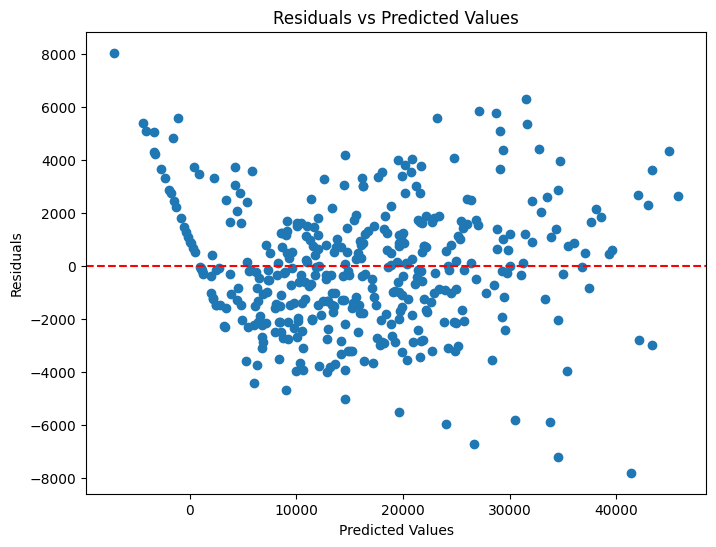

In [148]:
# Test Linearity & Homoscedasticity of residuals between predictors and the outcome variable.
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

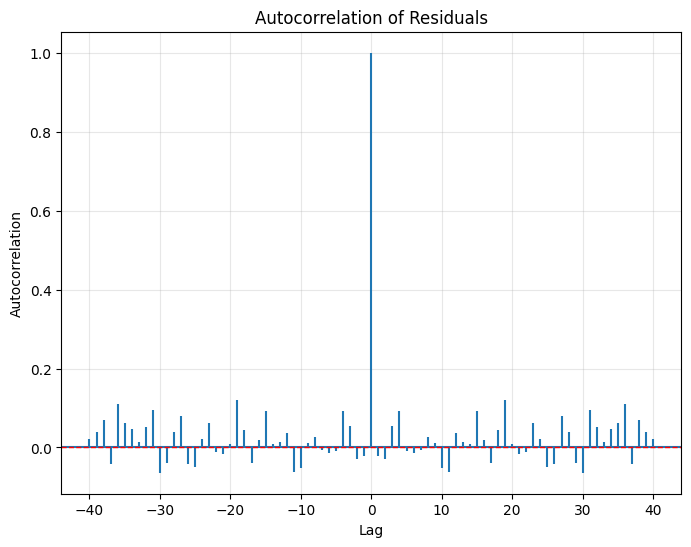

In [151]:
# Check that Residuals are independent (no autocorrelation)
plt.figure(figsize=(8,6))  # Changed from plt.Figure to plt.figure (lowercase 'f')
plt.acorr(residuals, maxlags=40)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add reference line at y=0
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Residuals')
plt.grid(True, alpha=0.3)  # Add subtle gridlines
plt.show()

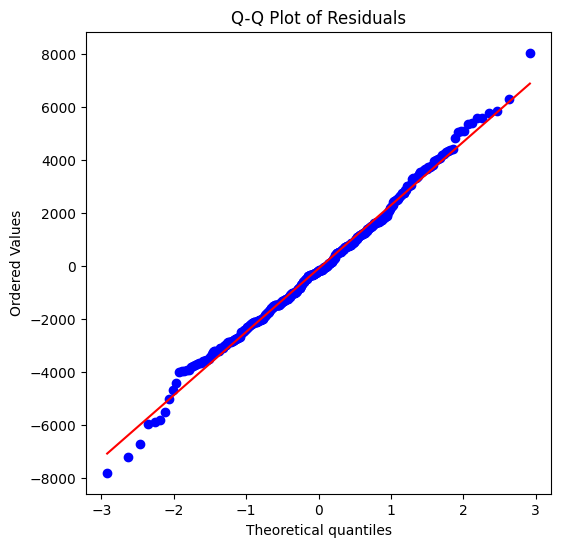

In [150]:
# Check normality of residuals with Q-Q plot.
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


##### **Logistic Regression**

##### Build the Model

##### Model Evaluation

##### Test Model Assumptions 📊

After developing your logistic regression model, check the following assumptions:

**1. Linearity of the Logit**
- Predictors have a linear relationship with the log odds of the outcome
- *Check with Box-Tidwell test or by plotting predictor vs. logit*

**2. Independence of Observations**
- Observations are independent of each other (no clustering or autocorrelation)
- *Consider data collection method and temporal dependencies*

**3. No Multicollinearity**
- Predictors are not highly correlated with each other
- *Already verified in Task 3j with VIF - reference those results*

**4. No Extreme Outliers or Influential Points**
- Outliers do not unduly influence the model
- *Assess with Cook's distance, leverage plots, and standardized residuals*

**5. Large Sample Size**
- Sufficient data for stable coefficient estimates
- *Rule of thumb: ≥10-15 events per predictor variable for each outcome class*

**6. Binary or Ordinal Outcome**
- Dependent variable must be binary (or ordinal for ordinal logistic regression)
- *Verify target variable has exactly 2 classes*

*Tip: Violations may require data transformation, removing influential observations, regularization (L1/L2), or alternative modeling approaches.*

##### **Decision Tree**

##### Build the Model

##### Model Evaluation

##### Save Model Iteration Scores

##### Generate SHAP Values for Feature Importance


| **Aspect**              | **Description**                                                                                           | **How to Read in SHAP Plot**                                                                                   |
|-------------------------|-----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| **Feature Ranking**     | Features are ordered by overall impact on model predictions.                                              | Top features are most influential; read from top to bottom.                                                     |
| **SHAP Value (X-axis)** | Amount each feature value increases or decreases the prediction for each sample.                          | Dots left of center lower prediction; dots right of center raise prediction.                                    |
| **Color Gradient**      | Shows the original feature value for each sample.                                                         | Blue = low value, Red/Pink = high value.                                                                        |
| **Spread**              | Shows how much feature impact varies across samples.                                                      | Wide spread = strong/variable effect; tight cluster = less impact.                                              |
| **Direction**           | Indicates if high or low feature values drive predictions up or down.                                     | If red dots are mostly right, high values increase prediction; if left, high values decrease prediction.        |
| **Summary**             | Identifies which features matter most and how they influence predictions.                                 | Use plot to explain model behavior and feature effects to stakeholders.                                         |

**Remove Features with Low Importance**

### Feature Importance Across Model Types

| Method             | Description                                                                                     | Importance for DT Models | Importance for RF Models | Importance for Linear Regression | Importance for Logistic Regression | Importance for XGBoost |
|--------------------|-------------------------------------------------------------------------------------------------|--------------------------|--------------------------|----------------------------------|-------------------------------------|-----------------------|
| Feature Importance | Uses model-specific metrics (e.g., Gini impurity, information gain) to rank feature importance. | High                     | High                     | Low                              | Low                                 | High                  |

### Feature Selection Methods Comparison

| Method                          | Description                                                                                     | Evaluation Approach                | Feature Interactions         | Computational Cost         | Flexibility                                  | Use Case                                                      |
|----------------------------------|-------------------------------------------------------------------------------------------------|------------------------------------|-----------------------------|----------------------------|-----------------------------------------------|---------------------------------------------------------------|
| Feature Importance Threshold     | Selects features above a set importance threshold.                                              | Static (single evaluation)         | Ignores                     | Low                        | Relies on fixed threshold                     | Fast, simple screening                                       |
| RFE (Recursive Feature Elimination) | Iteratively removes least important features, retraining the model each time.                 | Iterative (multiple retrainings)   | Considers dynamically       | High                       | Can specify number of features                | When feature interactions matter                              |
| RFECV                            | RFE with cross-validation to find optimal feature set.                                         | Iterative + Cross-validation       | Considers dynamically       | Very High                   | Automatically determines optimal features     | Automated optimal selection                                   |

*Tip: Use Table 1 to decide if feature importance is relevant for your model, then Table 2 to select the best feature selection method for your workflow.*

##### Test Model Assumptions 🌳

After developing your decision tree model, consider the following best practices and checks:

**1. Sufficient Sample Size**
- Adequate data to create meaningful splits and avoid overfitting
- *Ensure each terminal node has sufficient observations (min_samples_leaf)*

**2. Feature Relevance**
- Important features are included; irrelevant features may reduce performance
- *Review feature importance scores and remove low-impact features*

**3. Check for Overfitting**
- Model may memorize training data rather than learn patterns
- *Use cross-validation, prune tree, or limit max_depth and min_samples_split*

**4. Handle Class Imbalance (Classification)**
- Severe imbalance can bias splits toward majority class
- *Use class_weight='balanced', SMOTE, or stratified sampling*

**5. No Multicollinearity Requirement**
- Trees handle correlated features naturally
- *Note: Correlated features may affect feature importance interpretation*

**6. Interpretability Considerations**
- Feature importance may favor high-cardinality or continuous variables
- *Review importance scores critically and validate with domain knowledge*

**7. Hyperparameter Tuning**
- Model performance depends on proper parameter selection
- *Use GridSearchCV or RandomizedSearchCV for max_depth, min_samples_split, min_samples_leaf, max_features*

**8. Validation Strategy**
- Always evaluate on holdout/test set to assess generalization
- *Check for data leakage and ensure train/test split is representative*

**Advantages of Decision Trees:**
- No distributional assumptions (normality, homoscedasticity not required)
- Robust to outliers due to threshold-based splits
- Handles missing values (some implementations)
- Captures non-linear relationships and feature interactions automatically

*Tip: Document any assumption violations and mitigation steps for transparency and reproducibility.*

##### **Random Forest**

##### Buld the Model

##### Model Evaluation

##### Save Model Iteration Scores

**Remove Features with Low Importance**

### Feature Importance Across Model Types

| Method             | Description                                                                                     | Importance for DT Models | Importance for RF Models | Importance for Linear Regression | Importance for Logistic Regression | Importance for XGBoost |
|--------------------|-------------------------------------------------------------------------------------------------|--------------------------|--------------------------|----------------------------------|-------------------------------------|-----------------------|
| Feature Importance | Uses model-specific metrics (e.g., Gini impurity, information gain) to rank feature importance. | High                     | High                     | Low                              | Low                                 | High                  |

### Feature Selection Methods Comparison

| Method                          | Description                                                                                     | Evaluation Approach                | Feature Interactions         | Computational Cost         | Flexibility                                  | Use Case                                                      |
|----------------------------------|-------------------------------------------------------------------------------------------------|------------------------------------|-----------------------------|----------------------------|-----------------------------------------------|---------------------------------------------------------------|
| Feature Importance Threshold     | Selects features above a set importance threshold.                                              | Static (single evaluation)         | Ignores                     | Low                        | Relies on fixed threshold                     | Fast, simple screening                                       |
| RFE (Recursive Feature Elimination) | Iteratively removes least important features, retraining the model each time.                 | Iterative (multiple retrainings)   | Considers dynamically       | High                       | Can specify number of features                | When feature interactions matter                              |
| RFECV                            | RFE with cross-validation to find optimal feature set.                                         | Iterative + Cross-validation       | Considers dynamically       | Very High                   | Automatically determines optimal features     | Automated optimal selection                                   |

*Tip: Use Table 1 to decide if feature importance is relevant for your model, then Table 2 to select the best feature selection method for your workflow.*

##### Test Model Assumptions 🌲

After developing your random forest model, consider the following best practices and checks:

**1. Sufficient Sample Size**
- Adequate data to create meaningful splits across multiple trees
- *Ensure sufficient observations per terminal node across the forest*

**2. Feature Relevance**
- Important features are included; irrelevant features may dilute performance
- *Review feature importance scores and remove low-impact features*

**3. Check for Overfitting**
- Model may memorize training patterns despite ensemble averaging
- *Use out-of-bag (OOB) error, cross-validation, or limit n_estimators, max_depth, min_samples_split*

**4. Handle Class Imbalance (Classification)**
- Severe imbalance can bias predictions toward majority class
- *Use class_weight='balanced', balanced_subsample, or SMOTE*

**5. No Multicollinearity Requirement**
- Random forests handle correlated features naturally through random feature selection
- *Note: Correlated features may affect feature importance interpretation*

**6. Interpretability Considerations**
- Feature importance may favor high-cardinality or continuous variables
- *Review importance scores critically, validate with domain knowledge, and consider permutation importance*

**7. Hyperparameter Tuning**
- Model performance depends on proper parameter selection
- *Use GridSearchCV or RandomizedSearchCV for n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features*

**8. Validation Strategy**
- Always evaluate on holdout/test set to assess generalization
- *Check for data leakage and ensure train/test split is representative*

**Advantages of Random Forests:**
- No distributional assumptions (normality, homoscedasticity not required)
- Robust to outliers due to ensemble averaging and threshold-based splits
- Handles missing values (some implementations)
- Captures non-linear relationships and feature interactions automatically
- Reduces overfitting compared to single decision trees

*Tip: Document any assumption violations and mitigation steps for transparency and reproducibility.*

**Generate SHAP (SHapley Additive exPlanations**)

##### **XGBoost**

##### Buld the Model

##### Model Evaluation

**Remove Features with Low Importance**

### Feature Importance Across Model Types

| Method             | Description                                                                                     | Importance for DT Models | Importance for RF Models | Importance for Linear Regression | Importance for Logistic Regression | Importance for XGBoost |
|--------------------|-------------------------------------------------------------------------------------------------|--------------------------|--------------------------|----------------------------------|-------------------------------------|-----------------------|
| Feature Importance | Uses model-specific metrics (e.g., Gini impurity, information gain) to rank feature importance. | High                     | High                     | Low                              | Low                                 | High                  |

### Feature Selection Methods Comparison

| Method                          | Description                                                                                     | Evaluation Approach                | Feature Interactions         | Computational Cost         | Flexibility                                  | Use Case                                                      |
|----------------------------------|-------------------------------------------------------------------------------------------------|------------------------------------|-----------------------------|----------------------------|-----------------------------------------------|---------------------------------------------------------------|
| Feature Importance Threshold     | Selects features above a set importance threshold.                                              | Static (single evaluation)         | Ignores                     | Low                        | Relies on fixed threshold                     | Fast, simple screening                                       |
| RFE (Recursive Feature Elimination) | Iteratively removes least important features, retraining the model each time.                 | Iterative (multiple retrainings)   | Considers dynamically       | High                       | Can specify number of features                | When feature interactions matter                              |
| RFECV                            | RFE with cross-validation to find optimal feature set.                                         | Iterative + Cross-validation       | Considers dynamically       | Very High                   | Automatically determines optimal features     | Automated optimal selection                                   |

*Tip: Use Table 1 to decide if feature importance is relevant for your model, then Table 2 to select the best feature selection method for your workflow.*

##### Test Model Assumptions 🌲

After developing your random forest model, consider the following best practices and checks:

**1. Sufficient Sample Size**
- Adequate data to create meaningful splits across multiple trees
- *Ensure sufficient observations per terminal node across the forest*

**2. Feature Relevance**
- Important features are included; irrelevant features may dilute performance
- *Review feature importance scores and remove low-impact features*

**3. Check for Overfitting**
- Model may memorize training patterns despite ensemble averaging
- *Use out-of-bag (OOB) error, cross-validation, or limit n_estimators, max_depth, min_samples_split*

**4. Handle Class Imbalance (Classification)**
- Severe imbalance can bias predictions toward majority class
- *Use class_weight='balanced', balanced_subsample, or SMOTE*

**5. No Multicollinearity Requirement**
- Random forests handle correlated features naturally through random feature selection
- *Note: Correlated features may affect feature importance interpretation*

**6. Interpretability Considerations**
- Feature importance may favor high-cardinality or continuous variables
- *Review importance scores critically, validate with domain knowledge, and consider permutation importance*

**7. Hyperparameter Tuning**
- Model performance depends on proper parameter selection
- *Use GridSearchCV or RandomizedSearchCV for n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features*

**8. Validation Strategy**
- Always evaluate on holdout/test set to assess generalization
- *Check for data leakage and ensure train/test split is representative*

**Advantages of Random Forests:**
- No distributional assumptions (normality, homoscedasticity not required)
- Robust to outliers due to ensemble averaging and threshold-based splits
- Handles missing values (some implementations)
- Captures non-linear relationships and feature interactions automatically
- Reduces overfitting compared to single decision trees

*Tip: Document any assumption violations and mitigation steps for transparency and reproducibility.*

**Generate SHAP (SHapley Additive exPlanations**)

---
### ***End of Construct Section Insights***
- What model(s) performed best and why?
- Were any assumptions violated? How did you address them?
- What is your plan for communicating and deploying results?
- How will you evaluate model performance in production or real-world use?
- What are the key limitations or risks of your model(s) that stakeholders should know?
- What steps will you take to monitor, maintain, or update the model after deployment?
- How will you ensure ethical and responsible use of your model(s)?
- What metrics or visualizations will best communicate results to different audiences?

#### **Save Model Artifacts**

**Checkpoint:** Save your champion model and any supporting artifacts for deployment or future reference.

**Recommended to save:**
- Trained model file (`.pkl`, `.joblib`, or framework-specific format)
- Feature names and order used for training
- Preprocessing transformers (scalers, encoders)
- Model performance metrics
- Feature importance scores
- Training configuration and hyperparameters

**Example naming:** `{project_name}_champion_model_{model_type}_{date}.pkl`

#### **Task 4c. Model Comparison & Selection** 

**Compare All Models:**
- Evaluate all developed models on the same test set
- Compare performance metrics side-by-side
- Consider both predictive performance and business requirements
- Assess model complexity vs. interpretability trade-offs

**Select Champion Model:**
- Choose the model that best balances performance, interpretability, and business needs
- Document the rationale for your selection
- Identify backup models if primary choice faces deployment challenges

**Recommended Comparison Table:**

| Model               | Accuracy | Precision | Recall | F1-Score | AUC-ROC | Training Time | Interpretability | Notes |
|---------------------|----------|-----------|--------|----------|---------|---------------|------------------|-------|
| Logistic Regression |          |           |        |          |         |               | High             |       |
| Decision Tree       |          |           |        |          |         |               | High             |       |
| Random Forest       |          |           |        |          |         |               | Medium           |       |
| XGBoost             |          |           |        |          |         |               | Medium           |       |

**For Regression Models:**

| Model               | RMSE | MAE | R² | Adjusted R² | Training Time | Interpretability | Notes |
|---------------------|------|-----|----|-----------|--------------|--------------------|-------|
| Linear Regression   |      |     |    |           |              | High               |       |
| Decision Tree       |      |     |    |           |              | High               |       |
| Random Forest       |      |     |    |           |              | Medium             |       |
| XGBoost             |      |     |    |           |              | Medium             |       |

**Champion Model Selection:**
- **Selected Model:** [Model Name]
- **Rationale:** [Why this model was chosen - consider performance, business needs, interpretability, deployment constraints]
- **Key Strengths:** [What makes this model suitable]
- **Limitations:** [Known weaknesses or constraints]

---
### **Transition to Execute**

With your model(s) developed and validated, focus on evaluating results, drawing insights, and making actionable recommendations.

**✅ Before proceeding, ensure you have:**
- ✓ Built and trained multiple models
- ✓ Validated model assumptions for each model type
- ✓ Compared models using consistent metrics
- ✓ Selected a champion model with documented rationale
- ✓ Saved model artifacts and configuration
- ✓ Assessed model limitations and potential risks

**📋 Deliverables from Construct stage:**
- Trained models with performance metrics
- Model comparison table
- Champion model selection and justification
- Feature importance analysis
- Model assumptions validation results
- Saved model files and preprocessing artifacts

<img src="images/Execute.png" width="75" height="75" align=left>

## **pacE: Execute**

#### **Questions to reflect on during the Execute stage** 💭

- What are the key findings and practical implications from your statistical tests and predictive models?
- How do your results align with business objectives, and what actionable recommendations emerge?
- How confident are you in your conclusions, and what are the main limitations or risks?
- How will you communicate results and significance to stakeholders, and what visualizations best support your message?
- What is your plan for implementation, monitoring, and addressing ethical considerations or uncertainty?

### **Task 5. Results and Evaluation**

#### **Task 5a. Statistical Results Summary**

#### **Task 5b. Model Results Summary**

#### **Task 5c. Model Testing**

#### **Task 5d. Business Impact Analysis**

- **Key Findings & Significance:**  
  [Summarize what statistical tests and models reveal about the business problem. Is the difference/prediction meaningful in real-world terms?]

- **Business Context & Impact:**  
  [How do findings affect operations, strategy, and stakeholders? Who is impacted and how?]

- **Economic Assessment:**  
  [Compare current state costs vs. implementation costs. What are the expected benefits and net value? When will benefits be realized?]

- **Risks & Mitigation:**  
  [What could go wrong? What are the risks of acting or not acting? How will risks be mitigated? What are the key success factors?]

- **Action Plan & Monitoring:**  
  [What actions are recommended? How will you measure success and monitor impact over time?]

#### **Task 5e. Communication Materials**

- **Key Messages:**  
  - Primary Finding: [One-sentence summary of most important insight]  
  - Business Relevance: [Why this matters to the organization]  
  - Confidence Level: [Certainty of results]  
  - Call to Action: [Recommended next steps]

- **Stakeholder Summaries:**  
  - Leadership: [Strategic impact, ROI, timeline, decisions]  
  - Management: [Operational changes, resources, implementation steps]  
  - Technical: [Methodology, limitations, technical requirements]

- **Supporting Materials:**  
  - Visualizations: [Charts/graphics to communicate findings]  
  - Evidence: [Key statistics/metrics]  
  - Risk Assessment: [Major concerns and mitigation]

- **Implementation & Monitoring:**  
  - Immediate Actions: [Quick wins, urgent steps]  
  - Short-term Actions: [Milestones, next 1-3 months]  
  - Long-term: [Strategic initiatives, >3 months]  
  - Success Metrics: [How to measure effectiveness]  
  - Monitoring: [Review schedule, feedback process]  
  - Resources: [People, budget, technology]  
  - Risk Mitigation: [Contingency plans]  
  - Roles: [Who is responsible for each action]